In [1]:
def J(C,p,tau,t):
    return t+C*p*np.power(t,p-1)-tau

def bisection(a,b,tau):
    for i in range(100):
        c=(a+b)/2
        if np.abs(J(C,p,tau,c))<1e-3:
            break 

        if J(C,p,tau,a)*J(C,p,tau,c)<0:
            b=c
        else:
            a=c
    return c

Proximal operator $prox_{C|\cdot|^{1/2}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#x=np.linspace(-1,7,801)  #C=5
#x=np.linspace(-1,4.5,551)  #C=3
x=np.linspace(-1/2,1,501)  #C=1/3
n=np.shape(x)[0]
y12= np.zeros(n)  


C=1/3
for i in range(n):
    if x[i]<=0:
        y12[i]=x[i]
    elif np.logical_and(x[i]>0,x[i]<=(3/2)*np.power(C,2/3)):
        y12[i]=0
    else: 
        theta=np.arccos((-np.power(3,3/2)/4)*C*np.power(x[i],-3/2))
        y12[i]=(2/3)*x[i]*(1+ np.cos((2*theta)/3))

$p=\frac{2}{3}$

In [3]:
y23=np.zeros(n)
for i in range(n):
    if x[i]<=0:
        y23[i]=x[i]
    elif np.logical_and(x[i]>0,x[i]<=2*np.power(2*C/3,3/4)):
        y23[i]=0
    else: 
        t0=np.sqrt(np.power(x[i],4)/256 -8*np.power(C,3)/729)
        t=np.power(x[i]*x[i]/16 +t0,1/3)+np.power(x[i]*x[i]/16-t0,1/3)              
        y23[i]=(1/8)*np.power(np.sqrt(2*t) + np.sqrt(2*x[i]/np.sqrt(2*t)-2*t),3 )

Proximal operator $prox_{C|\cdot|_0}$

In [4]:
y0=np.zeros(n) 
for i in range(n):
    if np.logical_or(x[i]<0,x[i]>np.sqrt(2*C)):
        y0[i]=x[i]
    else:
        y0[i]=0

$p=\frac{1}{4}$

In [5]:
p=1/4  
tauCp=((2-p)/(2*(1-p)))*np.power(2*C*(1-p),1/(2-p))
tautilde=np.power(C*p*(1-p), 1/(2-p))
print('tautilde=',tautilde)
print('TauCp',tauCp)
y14=np.zeros(n)

print('J(tautilde)',J(C,p,tauCp+0.1,tautilde))
print('J(tau)',J(C,p,tauCp+0.01,tauCp+0.01))


for i in range(n):
    if x[i]<=0:
        y14[i]=x[i]
    elif np.logical_and(x[i]>0,x[i]<=tauCp):
        y14[i]=0
    else: 
        y14[i]=bisection(tautilde,x[i],x[i])  #bisection(a,b,tau)

tautilde= 0.2050838390019095
TauCp 0.7851084457022078
J(tautilde) -0.4065794880310857
J(tau) 0.09896895371867831


$p=\frac{4}{5}$

In [6]:
p=4/5  
tauCp=((2-p)/(2*(1-p)))*np.power(2*C*(1-p),1/(2-p))
tautilde=np.power(C*p*(1-p), 1/(2-p))
print('tautilde=',tautilde)
print('TauCp',tauCp)
y45=np.zeros(n)

for i in range(n):
    if x[i]<=0:
        y45[i]=x[i]
    elif np.logical_and(x[i]>0,x[i]<=tauCp):
        y45[i]=0
    else: 
        y45[i]=bisection(tautilde,x[i],x[i])  #bisection(a,b,tau)

tautilde= 0.08692918473465569
TauCp 0.5596332828679054


$p=\frac{5}{6}$

In [7]:
p=5/6  
tauCp=((2-p)/(2*(1-p)))*np.power(2*C*(1-p),1/(2-p))
tautilde=np.power(C*p*(1-p), 1/(2-p))
y56=np.zeros(n)

for i in range(n):
    if x[i]<=0:
        y56[i]=x[i]
    elif np.logical_and(x[i]>0,x[i]<=tauCp):
        y56[i]=0
    else: 
        y56[i]=bisection(tautilde,x[i],x[i])  

$p=\frac{9}{10}$

In [8]:
p=9/10  
tauCp=((2-p)/(2*(1-p)))*np.power(2*C*(1-p),1/(2-p))
tautilde=np.power(C*p*(1-p), 1/(2-p))
print('tautilde=',tautilde)
print('TauCp',tauCp)
y910=np.zeros(n)

print('J(tautilde)',J(C,p,tauCp+0.1,tautilde))
print('J(tau)',J(C,p,tauCp+0.01,tauCp+0.01))


for i in range(n):
    if x[i]<=0:
        y910[i]=x[i]
    elif np.logical_and(x[i]>0,x[i]<=tauCp):
        y910[i]=0
    else: 
        y910[i]=bisection(tautilde,x[i],x[i])  #bisection(a,b,tau)

tautilde= 0.04126337787514502
TauCp 0.4690172518212138
J(tautilde) -0.11512009519461852
J(tau) 0.3229134534183129


In [9]:
p=[0,1/4,1/2,2/3,4/5,5/6,9/10]
tauCp_p=np.zeros(7)
tau1_p=np.zeros(7)
for i in range(7):
    tauCp_p[i]=((2-p[i])/(2*(1-p[i])))*np.power(2*C*(1-p[i]),1/(2-p[i]))
    tau1_p[i]=np.power(2*C*(1-p[i]),1/(2-p[i]))

Figures

<function matplotlib.pyplot.show(close=None, block=None)>

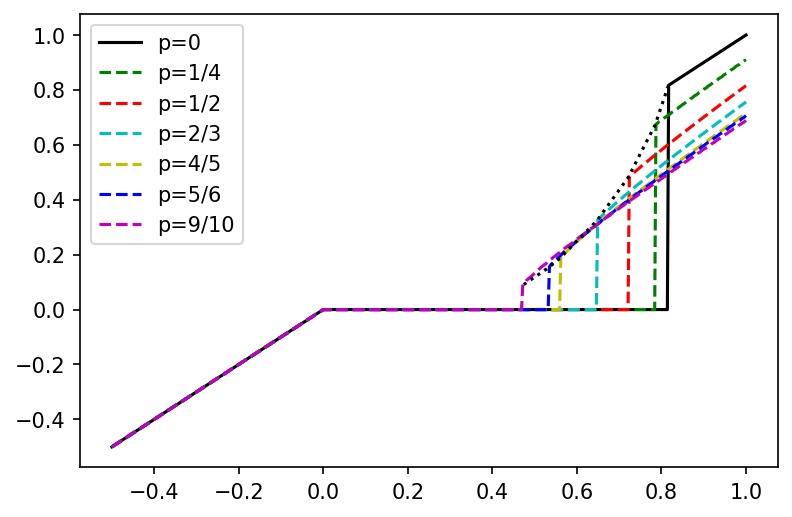

In [10]:
plt.rcParams['figure.dpi'] = 150 #分辨率
plt.plot(x,y0,'k-',label='p=0')
plt.plot(x,y14,'g--',label='p=1/4')
plt.plot(x,y12,'r--',label='p=1/2')
plt.plot(x,y23,'c--',label='p=2/3')
plt.plot(x,y45,'y--',label='p=4/5')
plt.plot(x,y56,'b--',label='p=5/6')
plt.plot(x,y910,'m--',label='p=9/10')
#plt.plot(x,x,'k--')
plt.plot(tauCp_p,tau1_p,'k:')
plt.legend()
plt.show